In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [11]:
FLAVORS=['numu','numubar']
def get_all_fluxes(horn):
    flux={}
    ec = {}
    de = {}
    for nu in FLAVORS:
        ec[nu], flux[nu] = np.genfromtxt(f"CHARM_II_{horn}_beam_{nu}_flux.dat",unpack=True,skip_header=2)
        de[nu] = ec[nu][1]-ec[nu][0]
    return ec, de, flux
        
efhc, defhc, fhc =get_all_fluxes('nu')
erhc, derhc, rhc =get_all_fluxes('nubar')

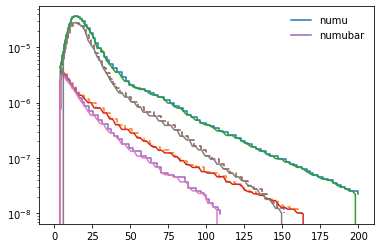

In [41]:

units=1e-13/3.7/3.7 ## 1e13POT/m^2
myE = np.linspace(0,200.0,100)
interp_fhc={}
interp_rhc={}
for nu in FLAVORS:
    plt.step(efhc[nu]-defhc[nu]/2, fhc[nu]*units,label=nu, where='post')
    plt.step(erhc[nu]-derhc[nu]/2, rhc[nu]*units,ls='--', where='post')
    
    # interpolate
    func=interpolate.interp1d(efhc[nu],fhc[nu]*units,bounds_error=False,fill_value=0,kind='nearest')
    interp_fhc[nu]=func(myE)
    plt.plot(myE,interp_fhc[nu])
   
    func=interpolate.interp1d(erhc[nu],rhc[nu]*units,bounds_error=False,fill_value=0,kind='nearest')
    interp_rhc[nu]=func(myE)
    plt.plot(myE,interp_rhc[nu])

# plt.xlim(0.0,20)
# plt.ylim(1e-3,1e2)
plt.yscale('log')
plt.legend(frameon=False)

In [42]:
globes_fhc = [myE, 
                interp_fhc['numu']*0,
              interp_fhc['numu'],
              interp_fhc['numu']*0,
                interp_fhc['numubar']*0,
              interp_fhc['numubar'],
              interp_fhc['numubar']*0]              

globes_rhc = [myE, 
                interp_rhc['numu']*0,
              interp_rhc['numu'],
              interp_rhc['numu']*0,
                interp_rhc['numubar']*0,
              interp_rhc['numubar'],
              interp_rhc['numu']*0]              

In [43]:
np.savetxt("../CHARMII_FHC.dat",np.array(globes_fhc).T,header='nus/m^2/GeV/POT')
np.savetxt("../CHARMII_RHC.dat",np.array(globes_rhc).T,header='nus/m^2/GeV/POT')

In [53]:
f=np.loadtxt("../NUMI_FHC_LE.dat",unpack=True)
r=np.loadtxt("../NUMI_RHC_LE.dat",unpack=True)

nf=np.loadtxt("../ND280_FHC.dat",unpack=True)
nr=np.loadtxt("../ND280_RHC.dat",unpack=True)

(0.0, 60.0)

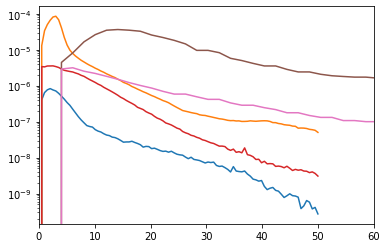

In [59]:
plt.plot(f[0],f[1])
plt.plot(f[0],f[2])
plt.plot(f[0],f[3])
plt.plot(f[0],f[5])
plt.plot(f[0],f[6])

plt.plot(myE,interp_fhc['numu'])
plt.plot(myE,interp_fhc['numubar'])

# plt.plot(r[0],r[1])
# plt.plot(r[0],r[2])
# plt.plot(r[0],r[3])
# plt.plot(r[0],r[5])
# plt.plot(r[0],r[6])
## test
# plt.plot(nr[0],nr[1]*1e-15*1e4,ls='--')
# plt.plot(nr[0],nr[2]*1e-15*1e4,ls='--')
# plt.plot(nr[0],nr[3]*1e-15*1e4,ls='--')
# plt.plot(nr[0],nr[5]*1e-15*1e4,ls='--')
# plt.plot(nr[0],nr[6]*1e-15*1e4,ls='--')
plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,60)